In [1]:
import requests
import networkx
import time
import collections
import matplotlib.pyplot as plt
import networkx as nx
import seaborn as sns
from main import *
from vk_token import *

In [2]:
%matplotlib inline

In [3]:
sns.set(style="whitegrid", color_codes=True)

## 1. My network summary

### 1.1. Network source and preprocessing

Source of my network is **VK**

In [4]:
id_to_analyse = 9106204
graph = {}
friend_ids = get_friends_ids(id_to_analyse)

In [5]:
# g = get_graph_with_friends_connections(friend_ids)

In [9]:
# get_friends_information(g)

Now we can write graph to file

In [10]:
networkx.write_gml(g, 'project1.gml')

In [5]:
g = nx.read_gml('project1.gml')

### Node degree graph

In [7]:
node_degree = nx.degree(g)

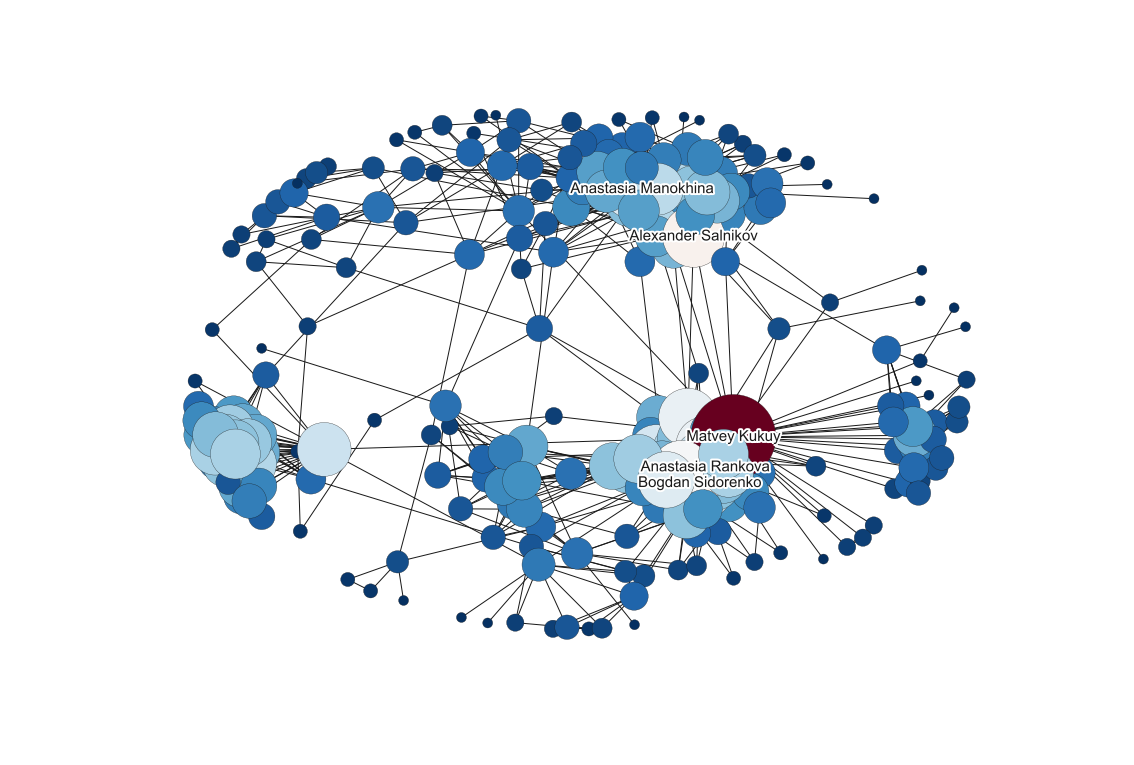

In [11]:
draw_graph(g, node_degree, 100)

### Degree distribution 

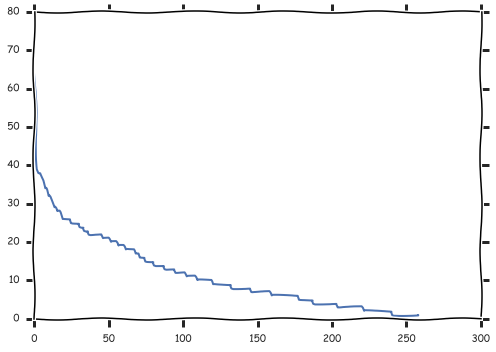

[259]


In [12]:
degree_sequence = sorted(nx.degree(g).values(),reverse=True)
plt.plot(degree_sequence,'b')
plt.show()
graphs = list(nx.connected_component_subgraphs(g))
print([len(g) for g in graphs])
g = graphs[0]

### Diameter

In [13]:
nx.diameter(g)

7

In [14]:
clustering = nx.clustering(g, nodes=None, weight=None)

### Clustering coefficient for nodes

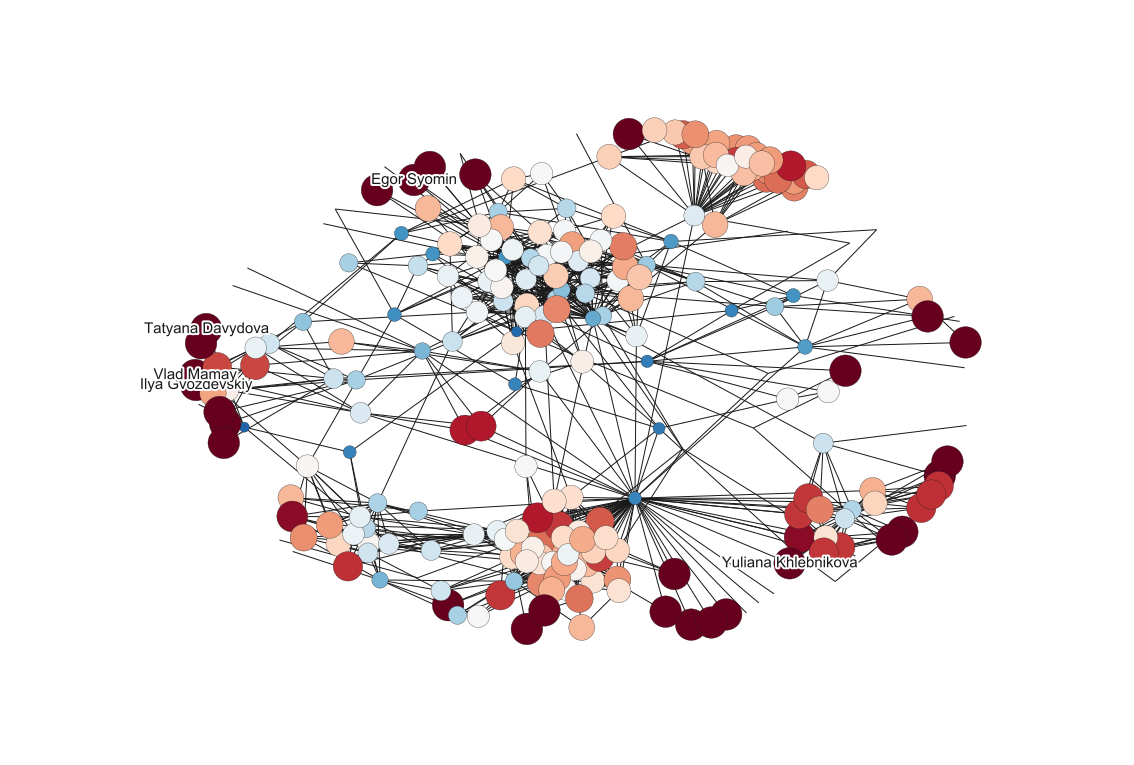

In [16]:
draw_graph(g, clustering, 1000)

In [17]:
nx.triangles(g)

{14616: 3,
 155830: 6,
 270802: 0,
 409037: 9,
 441753: 60,
 563476: 10,
 577000: 2,
 867629: 3,
 962641: 3,
 1344821: 3,
 1361053: 2,
 1536358: 10,
 1637317: 3,
 1779578: 0,
 1851013: 0,
 1895336: 6,
 1897964: 22,
 1963828: 0,
 1997601: 3,
 2020687: 1,
 2143146: 1,
 2490681: 0,
 2495192: 0,
 2668180: 20,
 2697990: 93,
 3019783: 100,
 3206170: 0,
 3229000: 1,
 3253026: 35,
 3327480: 13,
 3342327: 328,
 3367680: 195,
 3385112: 171,
 3423324: 284,
 3450568: 0,
 3661736: 7,
 3771235: 270,
 3776602: 5,
 3806153: 2,
 3814035: 2,
 3843256: 18,
 3915966: 17,
 4015282: 3,
 4373338: 126,
 4457987: 13,
 4471557: 306,
 4522330: 129,
 4644265: 1,
 4646119: 60,
 4690776: 18,
 4705640: 0,
 4784259: 133,
 4817860: 0,
 4896629: 172,
 4905018: 179,
 5131938: 364,
 5132511: 375,
 5215672: 0,
 5242217: 334,
 5378892: 0,
 5442615: 1,
 5594849: 13,
 5828549: 1,
 6153467: 1,
 6265769: 207,
 6371896: 0,
 6386422: 11,
 6592423: 0,
 6616064: 28,
 6662882: 1,
 6792091: 13,
 6794881: 10,
 6878087: 4,
 7037734: 4

### Graph transitivity, the fraction of all possible triangles present in *g*

In [18]:
nx.transitivity(g)

0.5106490701049718

### Average clustering

In [19]:
nx.average_clustering(g)

0.5411966142008633

## 2

### 2.1. Compute the degree centrality for nodes.

In [20]:
degree_centrality = networkx.degree_centrality(g)

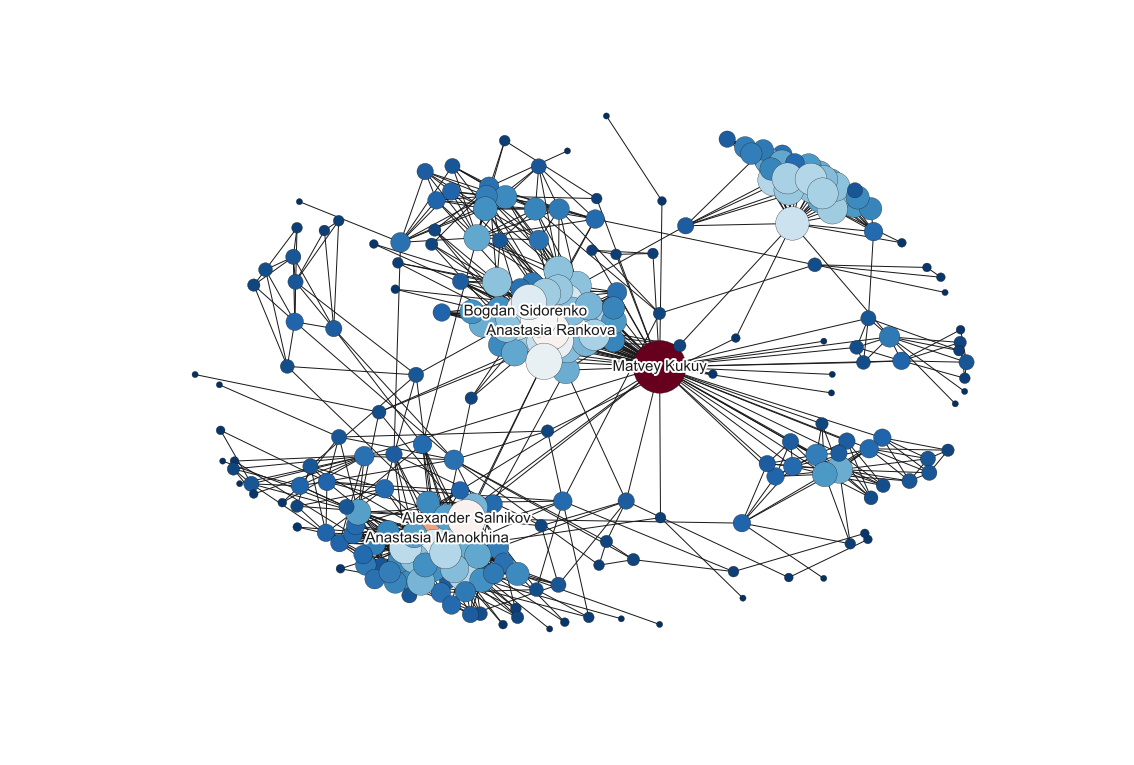

In [21]:
draw_graph(g, degree_centrality, 10000)

### 2.1. Compute closeness centrality for nodes.

In [22]:
closeness_centrality = networkx.closeness_centrality(g)

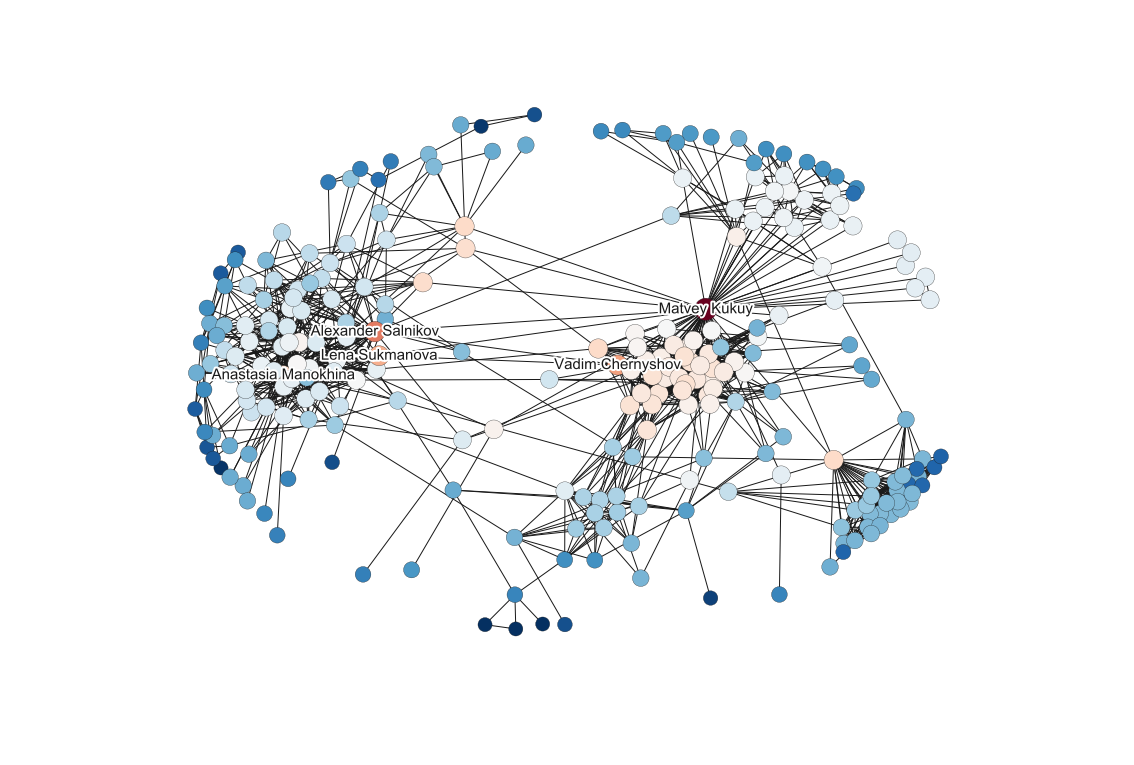

In [23]:
draw_graph(g, closeness_centrality, 1000)

### 2.1. Compute the shortest-path betweenness centrality for nodes

In [24]:
betweenness_centrality = networkx.betweenness_centrality(g)

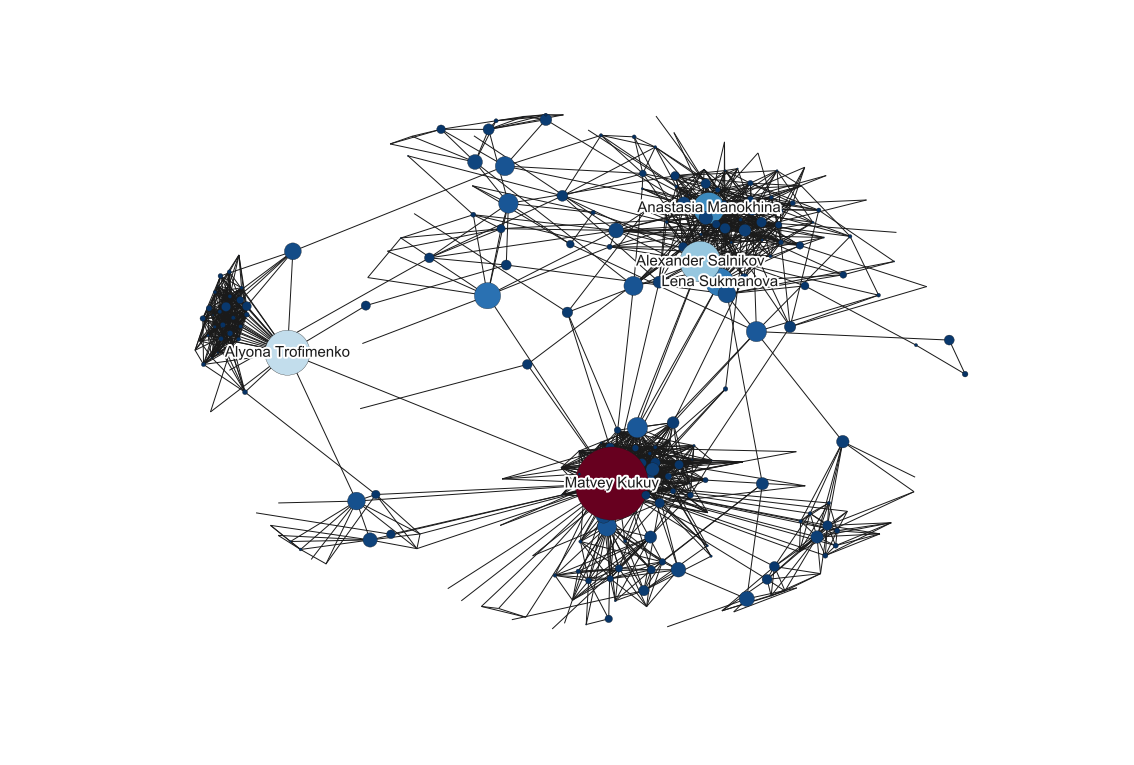

In [25]:
draw_graph(g, betweenness_centrality, 10000)

### Interpretation 

In [61]:
#

### 2.2. Page-Rank

In [26]:
pagerank = networkx.pagerank(g, alpha=0.85)

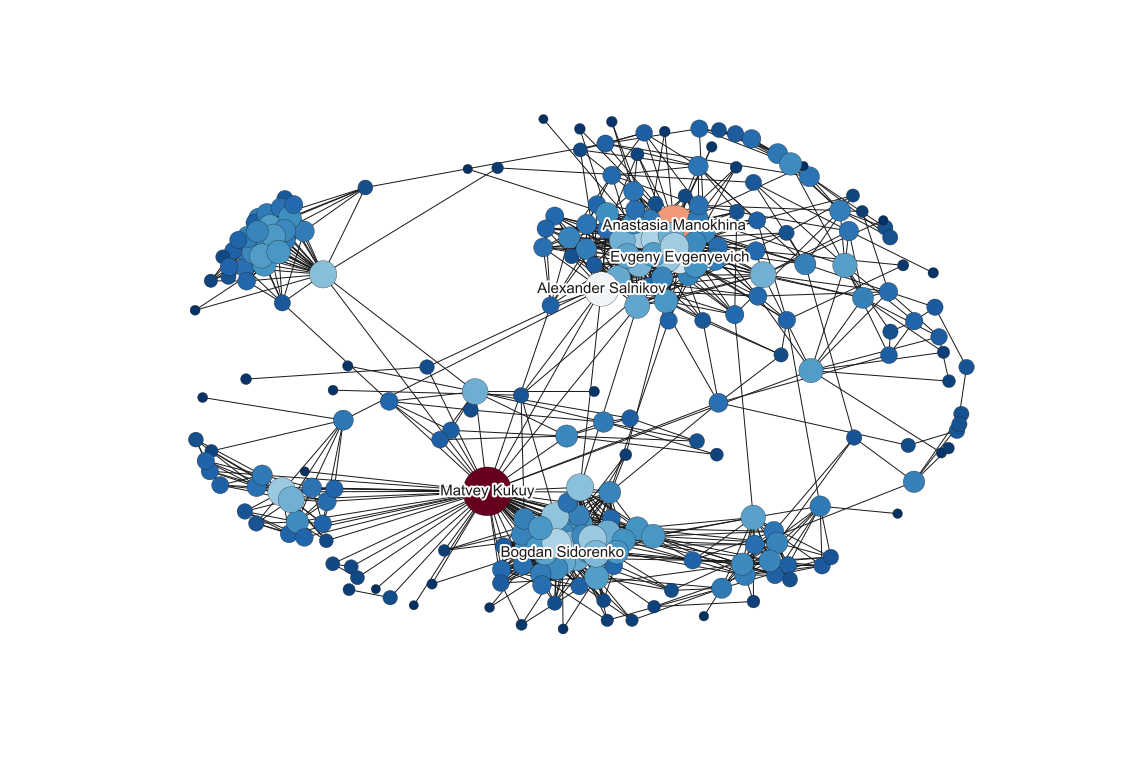

In [29]:
draw_graph(g, pagerank, 100000)